In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
output_folder = "figures"

In [3]:
title_font_size = 24
main_font_size = 22
legend_font_size = 20
dpi = 500
sns.set(font="Arial")

# Per Layer Scaling

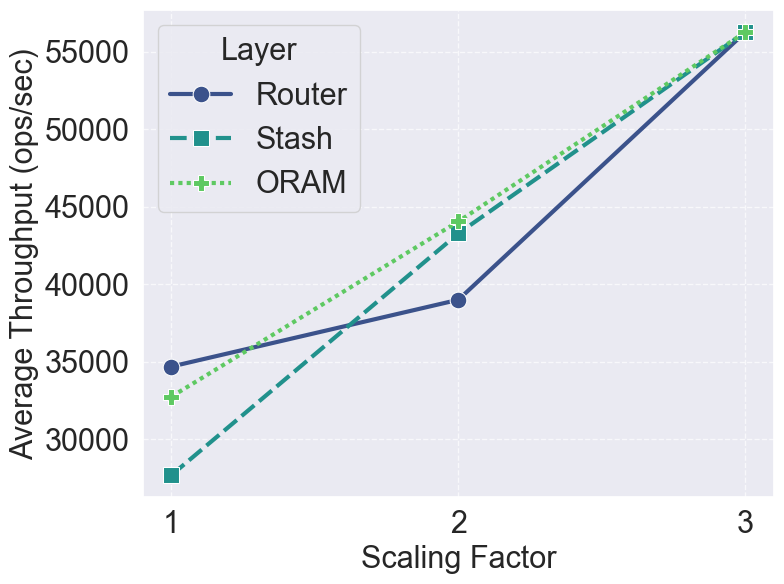

In [220]:
scaling = {
    "1": {
        "Router": [34344.368421, 34407.105263, 35327.315789],
        "Stash": [25211.947368, 24403.526316, 33445.526316],
        "ORAM": [28977.526316, 32802.833333, 36477.473684]
    },
    "2": {
        "Router": [33633.105263, 44754.894737, 38619.947368],
        "Stash": [42643.500000, 42029.000000, 45174.777778],
        "ORAM": [47631.842105, 35898.526316, 48639.894737]
    },
    "3": {
        "Router": [50477.157895, 57520.263158, 60826.470588],
        "Stash": [50477.157895, 57520.263158, 60826.470588],
        "ORAM": [50477.157895, 57520.263158, 60826.470588]
    }
}
averages = {}
for key, value in scaling.items():
    averages[key] = {}
    for sub_key, sub_value in value.items():
        averages[key][sub_key] = sum(sub_value) / len(sub_value)

# Convert data to DataFrame
df = pd.DataFrame(averages)

# Reshape DataFrame for Seaborn
df = df.stack().reset_index()
df.columns = ['Layer', 'Scaling Factor', 'Average']
markers = {'Router': 'o', 'Stash': 's', 'ORAM': 'P'}
palette = sns.color_palette("viridis", len(df['Layer'].unique()))
sns.set_palette("deep")

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Scaling Factor', y='Average', hue='Layer', style='Layer', markers=markers, markersize=12, linewidth=3, palette=palette)
# plt.title('Layer Scaling - Average Throughput', fontsize=title_font_size, fontweight='bold', pad=20)
plt.xlabel('Scaling Factor', fontsize=main_font_size)
plt.ylabel('Average Throughput (ops/sec)', fontsize=main_font_size)
plt.xticks(fontsize=main_font_size)
plt.yticks(fontsize=main_font_size)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Layer', title_fontsize=main_font_size, fontsize=main_font_size, loc='upper left')
plt.tight_layout()

output_path = os.path.join(output_folder, "layer_scaling_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# Dist Experiments

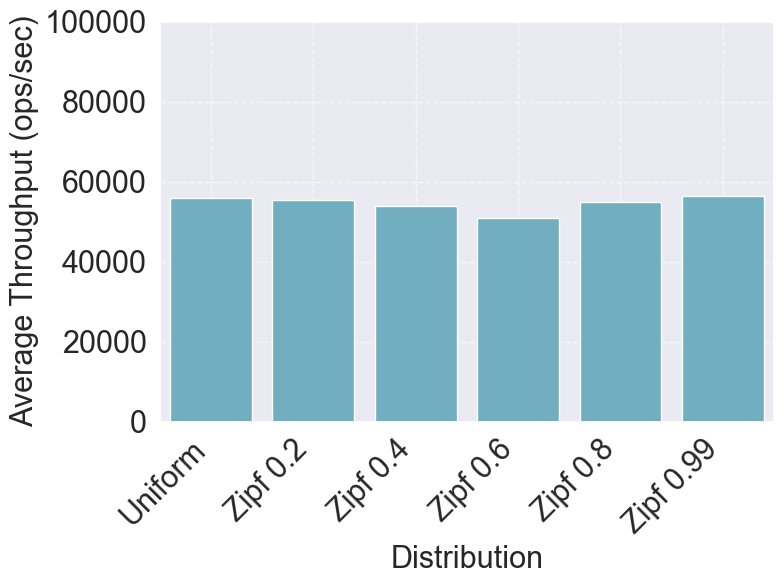

In [224]:
distribs = {
    "Uniform": [64858.117647, 49232.684211, 59028.473684, 55387.000000, 50965.157895],
    "Zipf 0.2": [60063.333333, 59647.166667, 59342.736842, 50623.473684, 47236.222222],
    "Zipf 0.4": [47992.315789, 62118.777778, 55522.631579, 57993.611111, 46432.052632],
    "Zipf 0.6": [53291.555556, 49854.157895, 52746.166667, 54903.000000, 43750.105263],
    "Zipf 0.8": [44940.631579, 55295.105263, 54262.944444, 55330.894737, 64171.705882],
    "Zipf 0.99": [58484.111111, 53647.105263, 56624.666667, 53109.631579, 60000.631579]
}

averages = {key: sum(values) / len(values) for key, values in distribs.items()}
df = pd.DataFrame.from_dict(averages, orient='index', columns=['Average'])
sns.set_palette("deep")
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x=df.index, y="Average", alpha=1, color=sns.color_palette()[9])
# plt.title('Distribution - Average Throughput', fontsize=title_font_size, fontweight='bold', pad=20)
plt.xlabel('Distribution', fontsize=main_font_size)
plt.ylabel('Average Throughput (ops/sec)', fontsize=main_font_size)
plt.xticks(rotation=45, ha='right', fontsize=main_font_size)
plt.yticks(fontsize=main_font_size)
plt.ylim(0, 100000)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = os.path.join(output_folder, "distribution_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# Epoch

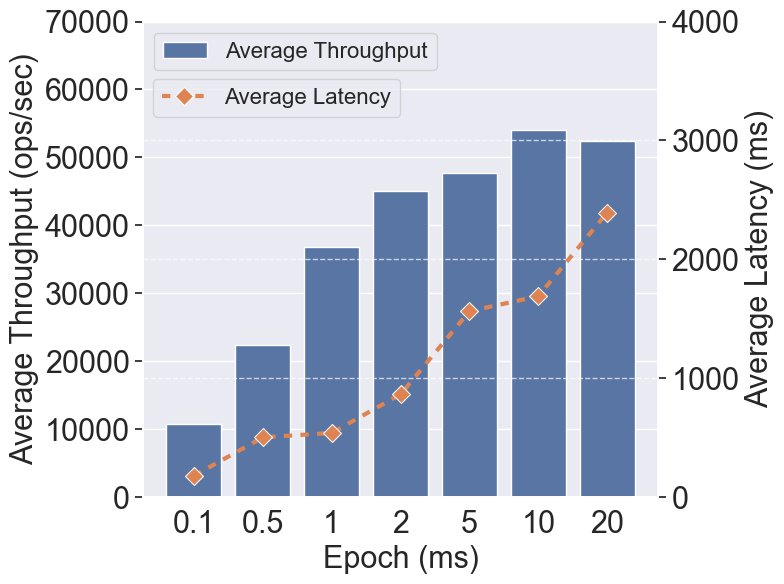

In [24]:
epoch_ths = {
    "0.1": [10653.947368, 10719.210526, 10769.473684],
    "0.5": [22476.157895, 21969.789474, 22812.210526],
    "1": [38038.157895, 36849.052632, 35534.210526],
    "2": [43313.684211, 44705.736842, 47201.555556],
    "5": [37689.105263, 51256.947368, 54107.157895],
    "10": [52217.444444, 55374.222222, 54416.222222],
    "20": [51079.473684, 50636.473684, 55717.111111]
}

epoch_latencies = {
    "0.1": [180.220690, 180.154694, 180.364742],
    "0.5": [420.902342, 550.169715, 539.346104],
    "1": [532.251679, 550.169715, 539.346104],
    "2": [875.896290, 873.235256, 845.181188],
    "5": [1869.687272, 1371.459048, 1448.735322],
    "10": [1801.001932, 1639.161188, 1631.914062],
    "20": [2322.950974, 2468.682090, 2386.433325]
}

average_ths = {key: sum(values) / len(values) for key, values in epoch_ths.items()}
average_lats = {key: sum(values) / len(values) for key, values in epoch_latencies.items()}
df_ths = pd.DataFrame.from_dict(average_ths, orient='index', columns=['Average Throughput'])
df_latencies = pd.DataFrame.from_dict(average_lats, orient='index', columns=['Average Latency'])

sns.set_palette("deep")
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
sns.barplot(data=df_ths, x=df_ths.index, y="Average Throughput", ax=ax1, label='Average Throughput')
sns.lineplot(data=df_latencies, ax=ax2, marker='D', markersize=9, linewidth=3, legend=False, dashes=[(2, 2)], palette=(sns.color_palette()[1], ), label='Average Latency')

ax1.legend(loc='upper left', fontsize=16)
ax2.legend(loc=(0.02,0.8), fontsize=16)

# plt.title('Epoch - Average Throughput', fontsize=title_font_size, fontweight='bold', pad=20)
ax1.set_xlabel('Epoch (ms)', fontsize=main_font_size)
ax1.set_ylabel('Average Throughput (ops/sec)', fontsize=main_font_size)
ax2.set_ylabel('Average Latency (ms)', fontsize=main_font_size)
ax1.tick_params(axis="both", labelsize=main_font_size)
ax2.tick_params(axis="both", labelsize=main_font_size)
ax1.set_ylim(0, 70000)
ax2.set_ylim(0, 4000)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = os.path.join(output_folder, "epoch_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# QuORAM

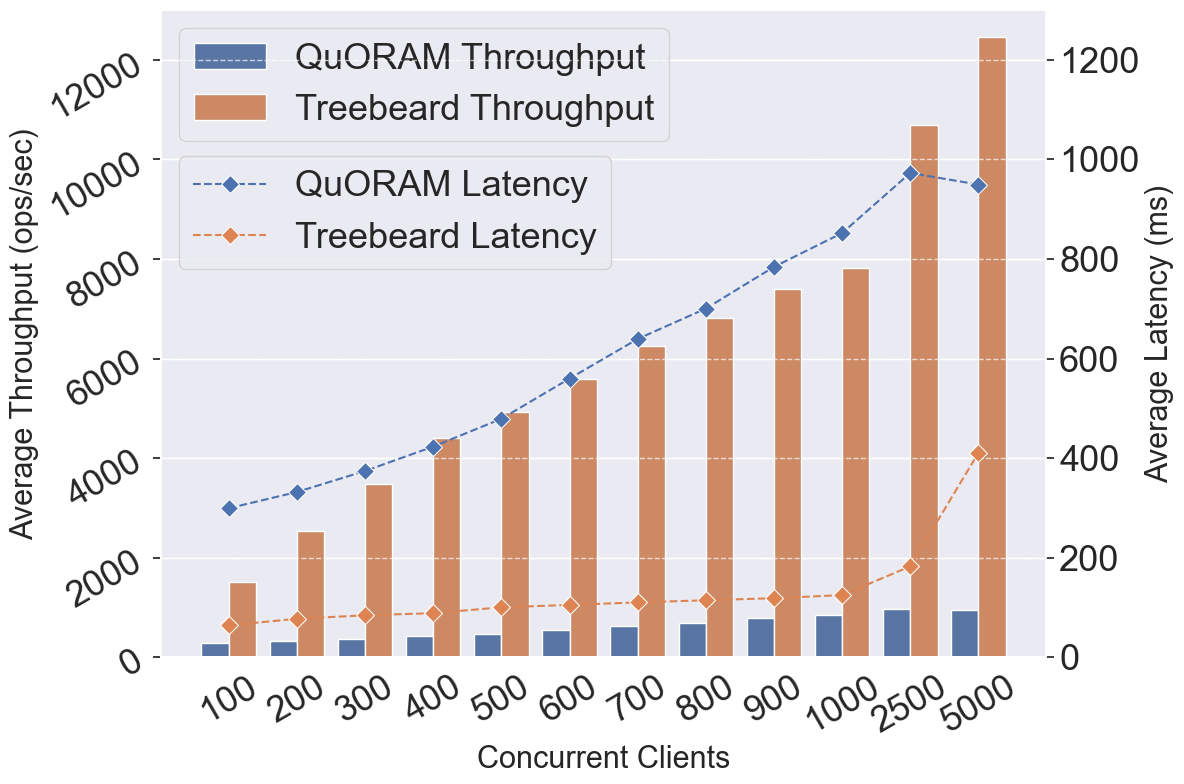

In [10]:
# QuORAM, Treebeard
ths = {
    "100": [[299.5555556], [1538.631579, 1464.315789, 1529.210526]],
    "200": [[332.1111111], [2597.105263, 2582.789474, 2409.684211]],
    "300": [[374.3333333], [3475.894737, 3345.842105, 3650.157895]],
    "400": [[423.3333333], [4322.736842, 4329.473684, 4557.631579]],
    "500": [[479.1111111], [5259.526316, 4706.473684, 4839.263158]],
    "600": [[559.8888889], [5439.421053, 5731.631579, 5574.105263]],
    "700": [[639.4444444], [6050.368421, 6212.631579, 6507.894737]],
    "800": [[700.4444444], [6827.368421, 6683.736842, 6922.421053]],
    "900": [[784.2222222], [7165.105263, 7324.947368, 7712.473684]],
    "1000": [[852.1111111], [7857.000000, 7632.105263, 7946.263158]],
    "2500": [[972.7777778], [11078.894737, 10830.210526, 10184.526316]],
    "5000": [[949.4444444], [13107.421053, 15052.000000, 9220.631579]]
}

lats = {
    "100": [[299.5555556], [62.651716, 67.520778, 62.999883]],
    "200": [[332.1111111], [75.304529, 76.247975, 81.153651]],
    "300": [[374.3333333], [85.051455, 87.861389, 80.963402]],
    "400": [[423.3333333], [90.172895, 91.173638, 85.229442]],
    "500": [[479.1111111], [93.723128, 104.624916, 103.430285]],
    "600": [[559.8888889], [107.931705, 101.642661, 106.568839]],
    "700": [[639.4444444], [116.372294, 109.521760, 105.634396]],
    "800": [[700.4444444], [113.972790, 116.942017, 113.320618]],
    "900": [[784.2222222], [122.294718, 120.645546, 114.000236]],
    "1000": [[852.1111111], [124.294954, 128.347972, 122.745438]],
    "2500": [[972.7777778], [177.247289, 180.112703, 191.354461]],
    "5000": [[949.4444444], [370.656726, 328.744124, 532.802413]]
}


ths_avg = {key: [np.mean(subval) for subval in value] for key, value in ths.items()}
lats_avg = {key: [np.mean(subval) for subval in value] for key, value in lats.items()}

ths_avg_df = pd.DataFrame.from_dict(ths_avg, orient='index', columns=['QuORAM Throughput', 'Treebeard Throughput'])
lats_avg_df = pd.DataFrame.from_dict(lats_avg, orient='index', columns=['QuORAM Latency', 'Treebeard Latency'])

ths_melted = ths_avg_df.reset_index().melt(id_vars='index', var_name='System', value_name='Value')
lats_melted = lats_avg_df.reset_index().melt(id_vars='index', var_name='System', value_name='Value')

sns.set_palette("deep")
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(data=ths_melted, x='index', y='Value', hue='System', ax=ax1)
ax1.legend(loc="upper left", fontsize=26)
ax2 = ax1.twinx()
sns.lineplot(data=lats_melted, ax=ax2, x='index', y='Value', hue='System', linestyle='--', marker='D', markersize=9)
ax2.legend(loc=(0.02,0.6), fontsize=26)

ax1.set_xlabel('Concurrent Clients', fontsize=28)
ax1.set_ylabel('Average Throughput (ops/sec)', fontsize=28)
ax2.set_ylabel('Average Latency (ms)', fontsize=28)
ax1.tick_params(axis="both", labelsize=26)
ax1.tick_params(rotation=30)
ax2.tick_params(axis="both", labelsize=26)
ax1.set_ylim(0, 13000)
ax2.set_ylim(0, 1300)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = os.path.join(output_folder, "quoram_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# Failure Experiments

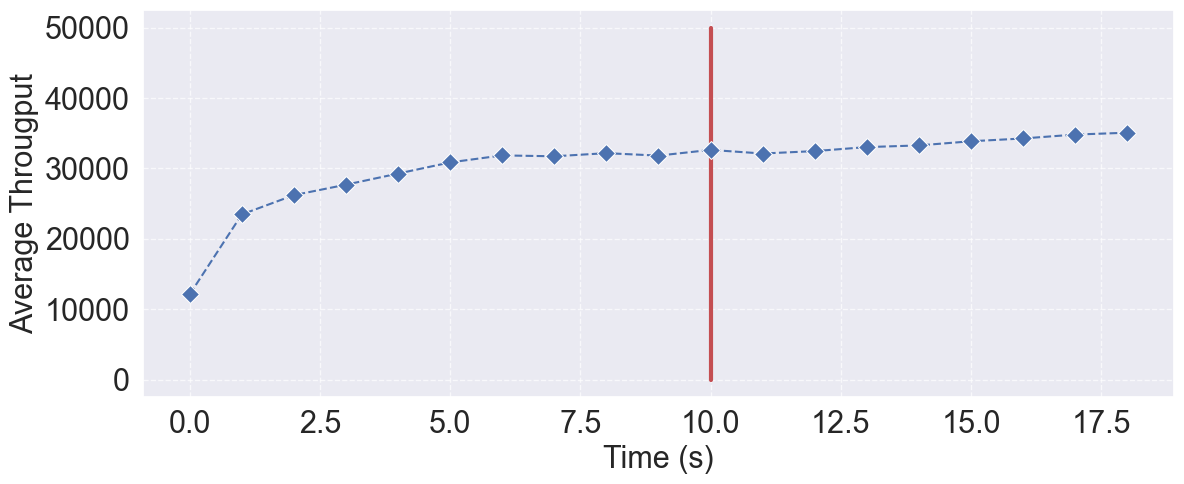

In [230]:
from statistics import mean

th_vals = [12121.0, 34817.0, 31676.0, 32152.0, 35573.0, 38788.0, 37823.0, 30823.0, 35734.0, 28686.0, 40753.0, 26446.0, 36578.0, 40446.0, 36583.0, 42715.0, 40598.0, 44200.0, 39840.0]
t_vals = [i for i in range(1, len(th_vals) + 1)]
final_vals = []
for i in range(len(th_vals)):
    final_vals.append(mean(th_vals[:i+1]))

sns.set_palette("deep")
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel("Time (s)", fontsize=main_font_size)
ax1.set_ylabel('Average Througput', fontsize=main_font_size)
ax1.tick_params(axis="both", labelsize=main_font_size)
plt.grid(True, linestyle='--', alpha=0.7)
ax1.plot([10, 10], [0, 50000], linewidth=3, color='r')
sns.lineplot(data=final_vals, ax=ax1, linestyle='--', marker='D', markersize=9)

plt.tight_layout()

output_path = os.path.join(output_folder, "stash_crash_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

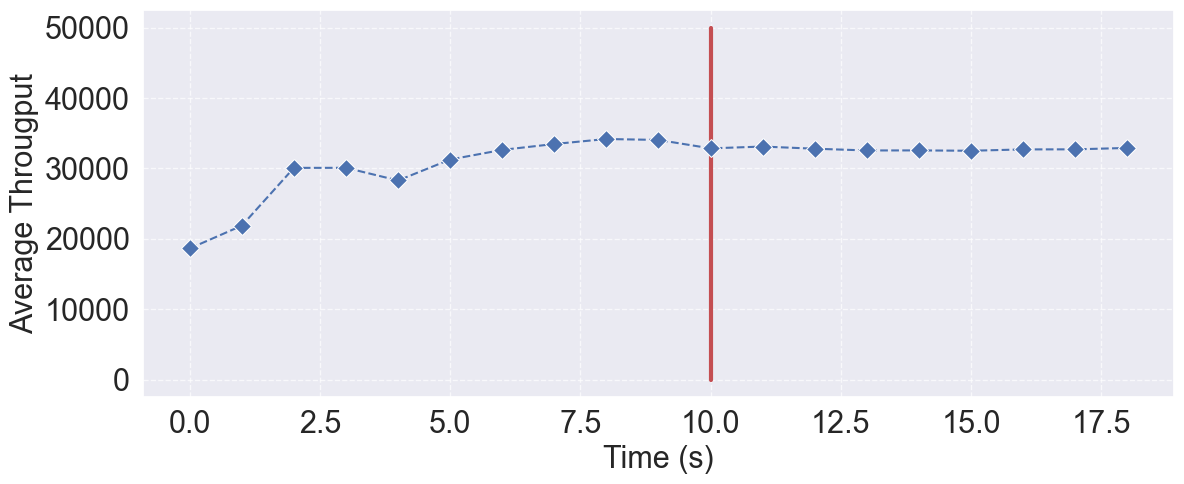

In [229]:
from statistics import mean

th_vals = [18635.000000, 25103.000000, 46495.000000, 30112.000000, 21086.000000, 46154.000000, 40841.000000, 39309.000000, 39868.000000, 32845.000000, 20896.000000, 35932.000000, 29132.000000, 29304.000000, 32673.000000, 31751.000000, 35768.000000, 32879.000000, 36449.000000]

t_vals = [i for i in range(1, len(th_vals) + 1)]
final_vals = []
for i in range(len(th_vals)):
    final_vals.append(mean(th_vals[:i+1]))

sns.set_palette("deep")
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel("Time (s)", fontsize=main_font_size)
ax1.set_ylabel('Average Througput', fontsize=main_font_size)
ax1.tick_params(axis="both", labelsize=main_font_size)
plt.grid(True, linestyle='--', alpha=0.7)
ax1.plot([10, 10], [0, 50000], linewidth=3, color='r')
sns.lineplot(data=final_vals, ax=ax1, linestyle='--', marker='D', markersize=9)

plt.tight_layout()

output_path = os.path.join(output_folder, "oram_crash_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# Snoopy

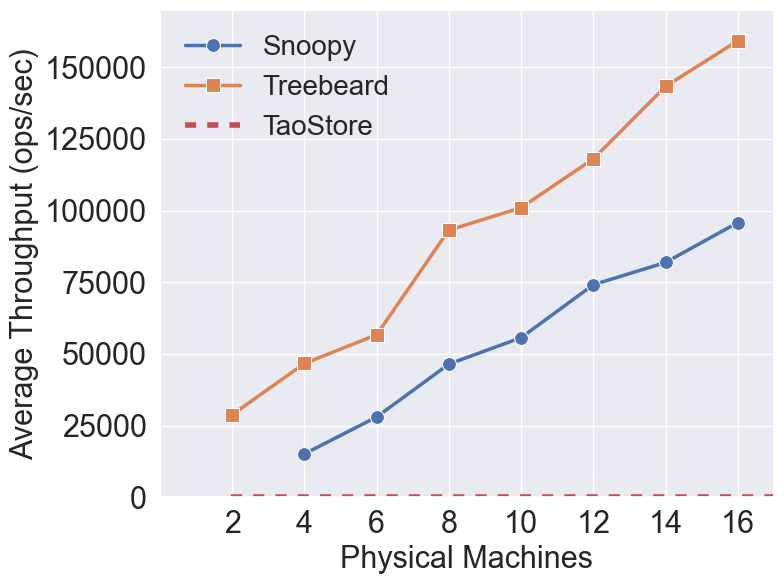

In [9]:
Snoopy_ths = {
    4: 15120,
    # 5: 20000,
    6: 28000,
    # 7: 40800,
    8: 46460,
    # 9: 51250,
    10: 55680,
    # 11: 62700,
    12: 74160,
    # 13: 72320,
    14: 81920,
    # 15: 86880,
    16: 95850
    # 17: 96960
    # 18: 108640
}

Treebeard_ths = {
    2: 28786.05,
    # 3: 33893.88,
    4: 46665.84,
    # 5: 48167.36,
    6: 56706.29,
    8: 93202.02,
    10: 101024.970357,
    12: 118077.4269003333,
    14: 143357.055556,
    16: 159278.4074076667,
}

sns.set_palette("deep")
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.lineplot(data=Snoopy_ths, ax=ax1, label="Snoopy", marker='o', markersize=10, linewidth=2.5)
ax = sns.lineplot(data=Treebeard_ths, ax=ax1, label="Treebeard", marker='s', markersize=10, linewidth=2.5)
ax.axhline(xmin=0.116, y = 245.98, linewidth=4, label="TaoStore", color="r", dashes=(2, 2))
ax1.legend(fontsize=legend_font_size, frameon=False)
ax1.set_xlabel('Physical Machines', fontsize=main_font_size)
ax1.set_ylabel('Average Throughput (ops/sec)', fontsize=main_font_size)
ax1.tick_params(axis="both", labelsize=main_font_size)
ax1.set_ylim(0, 170000)
ax1.set_xlim(0, 17)
ax1.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])

plt.tight_layout()

output_path = os.path.join(output_folder, "snoopy_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

## Block Size

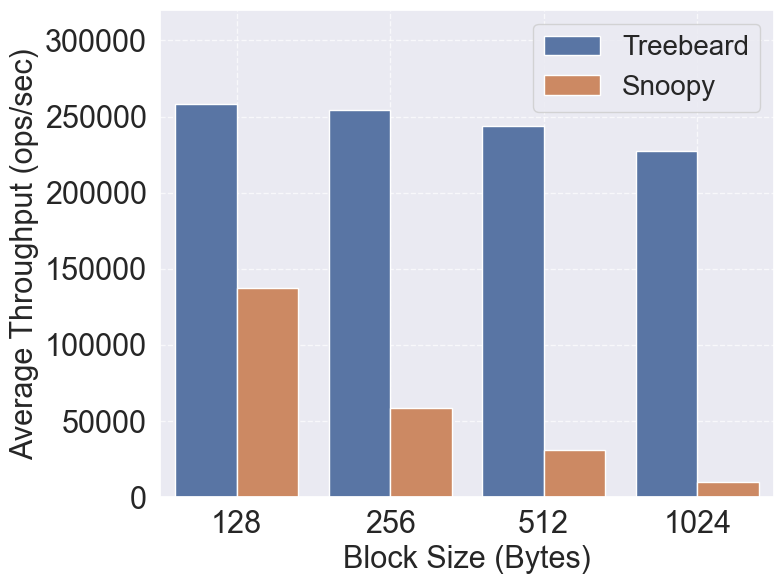

In [221]:
blocksize_ths = {
    "128": [258419.15, 137240],
    "256": [254246.67, 58500],
    "512": [243629.87, 30960],
    "1024": [227223.88, 9880]
}

blocksize_lats = {
    "128": [1545.833033, 2471],
    "256": [1629.665966, 1636],
    "512": [1801.564519, 2323],
    "1024": [1903.386724, 2127.5]
}
ths_avg_df = pd.DataFrame.from_dict(blocksize_ths, orient='index', columns=['Treebeard', 'Snoopy'])

ths_melted = ths_avg_df.reset_index().melt(id_vars='index', var_name='System', value_name='Value')

sns.set_palette("deep")
fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=ths_melted, x='index', y='Value', hue='System', ax=ax1)
ax1.legend(loc=0, fontsize=legend_font_size)
ax1.set_xlabel('Block Size (Bytes)', fontsize=main_font_size)
ax1.set_ylabel('Average Throughput (ops/sec)', fontsize=main_font_size)
ax1.tick_params(axis="both", labelsize=main_font_size)
ax1.set_ylim(0, 320000)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = os.path.join(output_folder, "snoopy_blocksize_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

# Stash

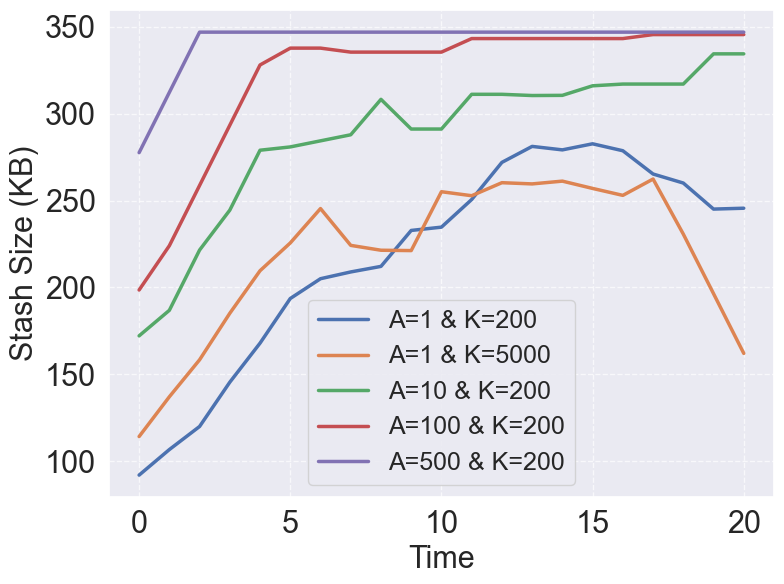

In [23]:
stash_A1_K200 = [0, 0, 0, 0, 9, 116, 285, 210, 133, 166, 147, 133, 255, 225, 266, 230, 324, 242, 340, 185, 306, 347, 347, 205, 301, 190, 190, 190, 190, 190]
stash_A1_K2000 = [0, 0, 0, 0, 50, 19, 194, 344, 347, 306, 312, 270, 259, 342, 116, 262, 347, 347, 227, 327, 239, 296, 294, 344, 94, 29, 0, 0, 0, 0]
stash_A1_K5000 = [0, 0, 0, 0, 122, 21, 297, 347, 347, 7, 229, 213, 268, 245, 282, 219, 85, 319, 345, 346, 206, 288, 261, 261, 240, 179, 179, 2, 2, 2]
stash_A10_K200 = [0, 0, 0, 0, 273, 302, 312, 143, 344, 347, 147, 347, 230, 345, 292, 337, 347, 347, 173, 347, 347, 347, 223, 346, 347, 347, 347, 347, 347, 347]
stash_A10_K2000 = [0, 0, 0, 0, 296, 346, 133, 327, 26, 301, 347, 103, 330, 343, 347, 224, 343, 25, 311, 347, 347, 347, 122, 347, 301, 330, 330, 330, 330, 330]
stash_A10_K5000 = [0, 0, 0, 0, 4, 329, 329, 329, 347, 347, 347, 347, 169, 347, 347, 347, 290, 347, 347, 347, 313, 347, 347, 5, 347, 347, 347, 200, 200, 200]
stash_A100_K200 = [0, 0, 0, 0, 250, 347, 347, 347, 347, 347, 255, 347, 347, 347, 347, 347, 324, 347, 347, 347, 333, 347, 347, 347, 347, 347, 347, 347, 347, 347]
stash_A500_K200 = [0, 0, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347]

# Define the window size and step
window_size = 10
step = 1

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Plotting
plt.figure(figsize=(8, 6))

for stash, label in [ 
                     (stash_A1_K200, 'A=1 & K=200'), 
                     (stash_A1_K5000, 'A=1 & K=5000'), 
                     (stash_A10_K200, 'A=10 & K=200'),
                     # (stash_A10_K5000, 'A=10 & K=5000'), 
                     (stash_A100_K200, 'A=100 & K=200'),
                     (stash_A500_K200, 'A=500 & K=200')
                    ]:
    averages = moving_average(stash, window_size)
    sns.lineplot(x=range(len(averages)), y=averages, label=label, linewidth=2.5)

plt.xlabel('Time', fontsize=main_font_size)
plt.ylabel('Stash Size (KB)', fontsize=main_font_size)
plt.legend(fontsize=18)
plt.tick_params(axis="both", labelsize=main_font_size)
# plt.ylim(0.15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = os.path.join(output_folder, "stash_plot.png")
plt.savefig(output_path, dpi=dpi)
plt.show()

In [12]:
moving_average(stash_A1_K200, window_size)

array([0.0919, 0.1066, 0.1199, 0.1454, 0.1679, 0.1936, 0.205 , 0.2089,
       0.2121, 0.2328, 0.2347, 0.2506, 0.272 , 0.2812, 0.2792, 0.2827,
       0.2787, 0.2653, 0.2601, 0.2451, 0.2456])

In [15]:
moving_average(stash_A500_K200, window_size)

array([0.2776, 0.3123, 0.347 , 0.347 , 0.347 , 0.347 , 0.347 , 0.347 ,
       0.347 , 0.347 , 0.347 , 0.347 , 0.347 , 0.347 , 0.347 , 0.347 ,
       0.347 , 0.347 , 0.347 , 0.347 , 0.347 ])

In [16]:
(0.347 - 0.2827) / 0.2827 * 100

22.744959320834795